# German Credit Dataset <br>

ㅇData Source : https://www.openml.org/d/31 
<br>
1. Title: German Credit data<br>
<br>
2. Number of Instances: 1000<br>
<br>

3. Number of features: 20<br>
<br>
4. Target : Good / Bad<br>
<br>

# Ver 2.0 : Feature Engineering <br>
-> merge or categorizing newly small sample size Feature <br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import matplotlib as mpl
import re
from collections import Counter
from nltk.tag import pos_tag
import seaborn as sns
import nltk
import arff
from scipy.io import arff

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

RANDOM_SEED = 2

%matplotlib inline

In [2]:

from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix


In [3]:

def load_german_data():
    
    data= arff.loadarff('./data/dataset_31_credit-g.arff')
    df = pd.DataFrame(data[0])
    
    col_names = list(df.isnull().sum().index)
        
    # Change Binary Category to 1 or 0
    
    # Good : 1, Bad : 0
    df_dummy = pd.get_dummies(df['class'])
    df['class'] = df_dummy.iloc[:,1]
    
    # Yes : 1, No : 0
    df_dummy = pd.get_dummies(df['own_telephone'])
    df['own_telephone'] = df_dummy.iloc[:,1]
    
    # Foreign Yes: 1, No : 0
    df_dummy = pd.get_dummies(df['foreign_worker'])
    df['foreign_worker'] = df_dummy.iloc[:,1]
    
    # Num Depden 1 : 0, 2 : 1
    df_dummy = pd.get_dummies(df['num_dependents'])
    df['num_dependents'] = df_dummy.iloc[:,1]
    
    df['installment_commitment'] = df['installment_commitment'].astype(object)
    df['residence_since'] = df['residence_since'].astype(object)
    df['existing_credits'] = df['existing_credits'].astype(object)

    return df, col_names
df, col_names = load_german_data()
df.head(10)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,"b""'<0'""",6.0,"b""'critical/other existing credit'""",b'radio/tv',1169.0,"b""'no known savings'""","b""'>=7'""",4,"b""'male single'""",b'none',4,"b""'real estate'""",67.0,b'none',b'own',2,b'skilled',0,1,1,1
1,"b""'0<=X<200'""",48.0,"b""'existing paid'""",b'radio/tv',5951.0,"b""'<100'""","b""'1<=X<4'""",2,"b""'female div/dep/mar'""",b'none',2,"b""'real estate'""",22.0,b'none',b'own',1,b'skilled',0,0,1,0
2,"b""'no checking'""",12.0,"b""'critical/other existing credit'""",b'education',2096.0,"b""'<100'""","b""'4<=X<7'""",2,"b""'male single'""",b'none',3,"b""'real estate'""",49.0,b'none',b'own',1,"b""'unskilled resident'""",1,0,1,1
3,"b""'<0'""",42.0,"b""'existing paid'""",b'furniture/equipment',7882.0,"b""'<100'""","b""'4<=X<7'""",2,"b""'male single'""",b'guarantor',4,"b""'life insurance'""",45.0,b'none',"b""'for free'""",1,b'skilled',1,0,1,1
4,"b""'<0'""",24.0,"b""'delayed previously'""","b""'new car'""",4870.0,"b""'<100'""","b""'1<=X<4'""",3,"b""'male single'""",b'none',4,"b""'no known property'""",53.0,b'none',"b""'for free'""",2,b'skilled',1,0,1,0
5,"b""'no checking'""",36.0,"b""'existing paid'""",b'education',9055.0,"b""'no known savings'""","b""'1<=X<4'""",2,"b""'male single'""",b'none',4,"b""'no known property'""",35.0,b'none',"b""'for free'""",1,"b""'unskilled resident'""",1,1,1,1
6,"b""'no checking'""",24.0,"b""'existing paid'""",b'furniture/equipment',2835.0,"b""'500<=X<1000'""","b""'>=7'""",3,"b""'male single'""",b'none',4,"b""'life insurance'""",53.0,b'none',b'own',1,b'skilled',0,0,1,1
7,"b""'0<=X<200'""",36.0,"b""'existing paid'""","b""'used car'""",6948.0,"b""'<100'""","b""'1<=X<4'""",2,"b""'male single'""",b'none',2,b'car',35.0,b'none',b'rent',1,"b""'high qualif/self emp/mgmt'""",0,1,1,1
8,"b""'no checking'""",12.0,"b""'existing paid'""",b'radio/tv',3059.0,"b""'>=1000'""","b""'4<=X<7'""",2,"b""'male div/sep'""",b'none',4,"b""'real estate'""",61.0,b'none',b'own',1,"b""'unskilled resident'""",0,0,1,1
9,"b""'0<=X<200'""",30.0,"b""'critical/other existing credit'""","b""'new car'""",5234.0,"b""'<100'""",b'unemployed',4,"b""'male mar/wid'""",b'none',2,b'car',28.0,b'none',b'own',2,"b""'high qualif/self emp/mgmt'""",0,0,1,0


In [4]:
def display_barplot(df, col_name):
    sns.factorplot(col_name,'class', data=df,size=4,aspect=3)
    print (df.pivot_table('own_telephone', index=[col_name,'class'] , aggfunc='count'))
    
def numerical_barplot(df, col_name):
    fig, axis1 = plt.subplots(1,1,figsize=(18,4))
    average_col = df[[col_name, "class"]].groupby([col_name],as_index=False).mean()
    sns.barplot(x=col_name, y='class', data=average_col)
    

In [5]:
def stack_barplot(df, col_name):
    """
    tacked_bar_data["total"] = stacked_bar_data.Series1 + stacked_bar_data.Series2

    #Set general plot properties
    sns.set_style("white")
    sns.set_context({"figure.figsize": (24, 10)})

    #Plot 1 - background - "total" (top) series
    sns.barplot(x = stacked_bar_data.Group, y = stacked_bar_data.total, color = "red")

    #Plot 2 - overlay - "bottom" series
    bottom_plot = sns.barplot(x = stacked_bar_data.Group, y = stacked_bar_data.Series1, color = "#0000A3")


    topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
    bottombar = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')
    l = plt.legend([bottombar, topbar], ['Bottom Bar', 'Top Bar'], loc=1, ncol = 2, prop={'size':16})
    l.draw_frame(False)

    #Optional code - Make plot look nicer
    sns.despine(left=True)
    bottom_plot.set_ylabel("Y-axis label")
    bottom_plot.set_xlabel("X-axis label")

    #Set fonts to consistent 16pt size
    for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
                 bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
        item.set_fontsize(16)
    """   
    good_class = df[df['class']==1][col_name].value_counts()
    bad_class = df[df['class']==0][col_name].value_counts()
    df_plot = pd.DataFrame([good_class,bad_class])
    df_plot.index = ['Good','Bad']
    df_plot.plot(kind='bar',stacked=True, figsize=(13,8))
    


In [6]:
def stacked_category_barplot(df, col_name):
    
    class_1 = df[(df['class']==1)].groupby(col_name)[col_name].count()
    class_0 = df[(df['class']==0)].groupby(col_name)[col_name].count()
    
    df_plot = pd.DataFrame(index = class_1.index, columns = ['Good','Bad'])
    df_plot['Good'] = class_1.tolist()
    df_plot['Bad'] = class_0.tolist()
    df_plot.plot(kind='bar',stacked=True, figsize=(13,8))
    
    df_plot['ratio'] = df_plot['Good']/(df_plot['Good']+df_plot['Bad'])
    sns.factorplot(x=df_plot.index,y='ratio', data=df_plot,size=4,aspect=3)

In [ ]:
sns.heatmap(df_cat[['checking_status','credit_history','existing_credits','class']].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

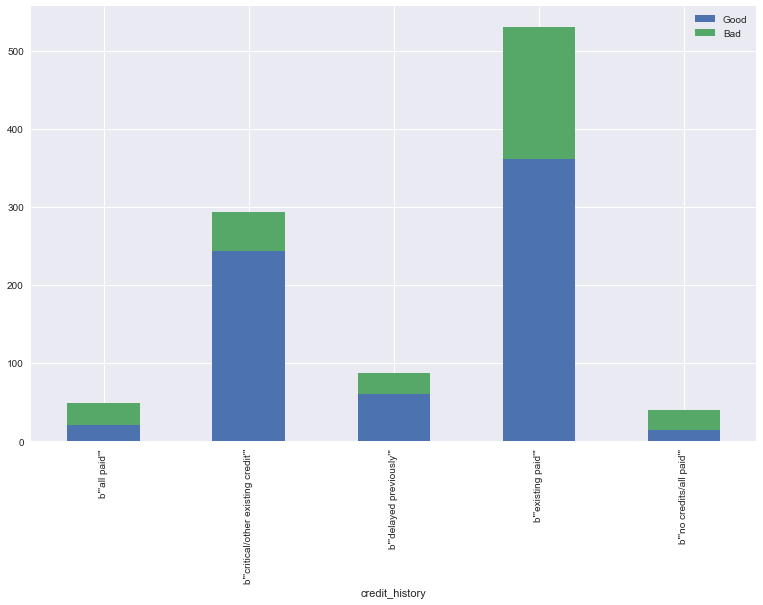

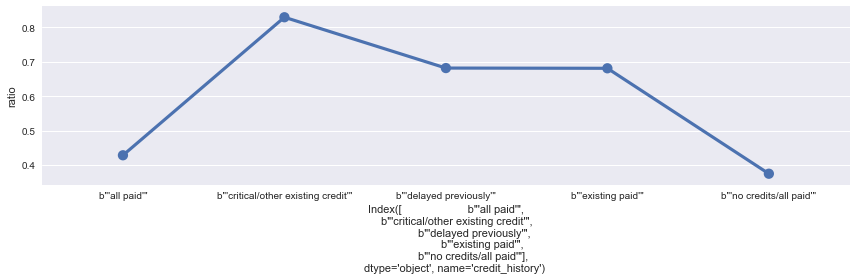

In [7]:
stacked_category_barplot(df, 'credit_history')
 

'credit_history' seems to have relationship to class as intuition.<br>
> divide 3 category : all pain -0, delay / existing - 1, critical - 2

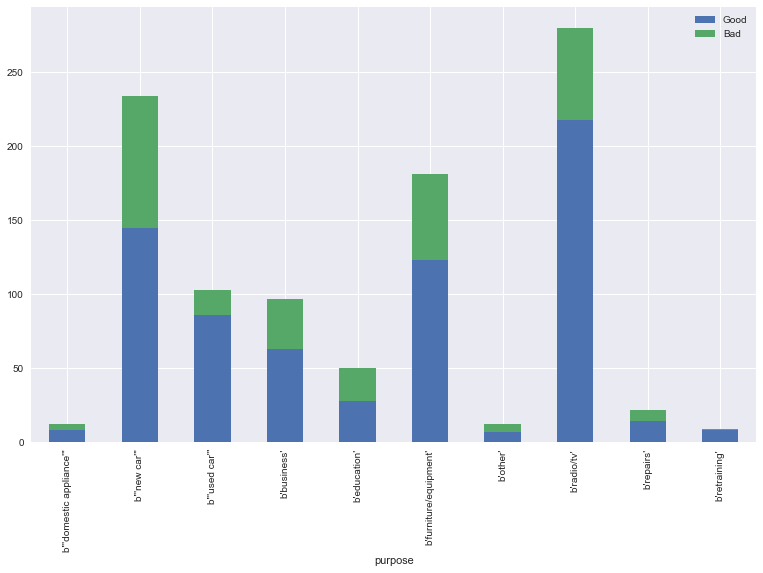

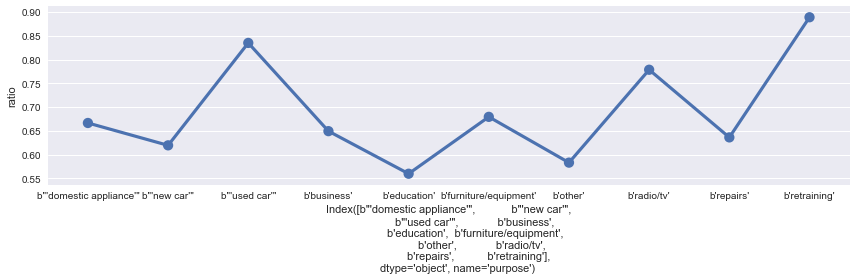

In [8]:
stacked_category_barplot(df, 'purpose')


> divide 2 : used-car , radio, retaining - 1, others 0 

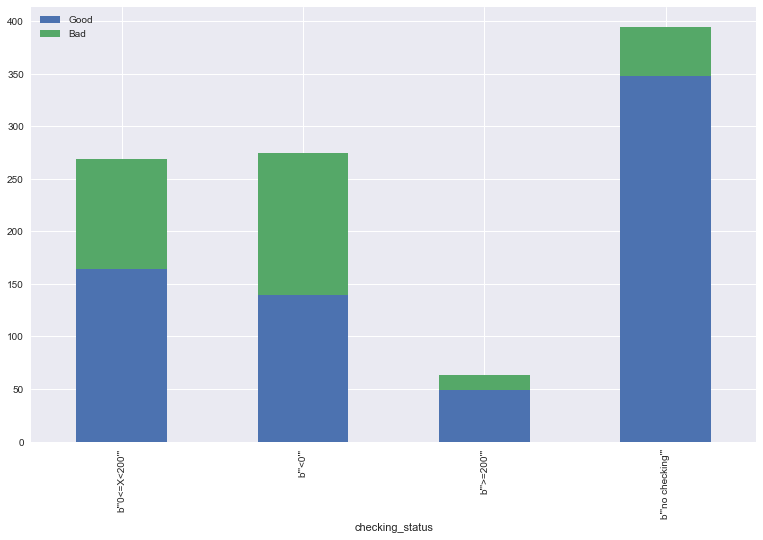

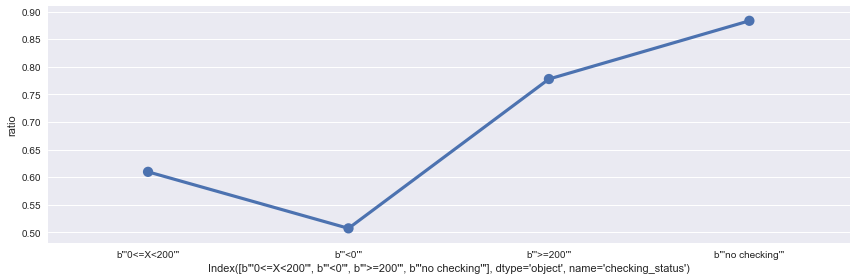

In [9]:
stacked_category_barplot(df, 'checking_status')

'checking_status' has some what relationship whit class<Br>
but I don't know why the 'No cheking' has the highest class mean <br>
> divide 3 category : x<0 - 0, 0 < x < 200 - 1, other - 2

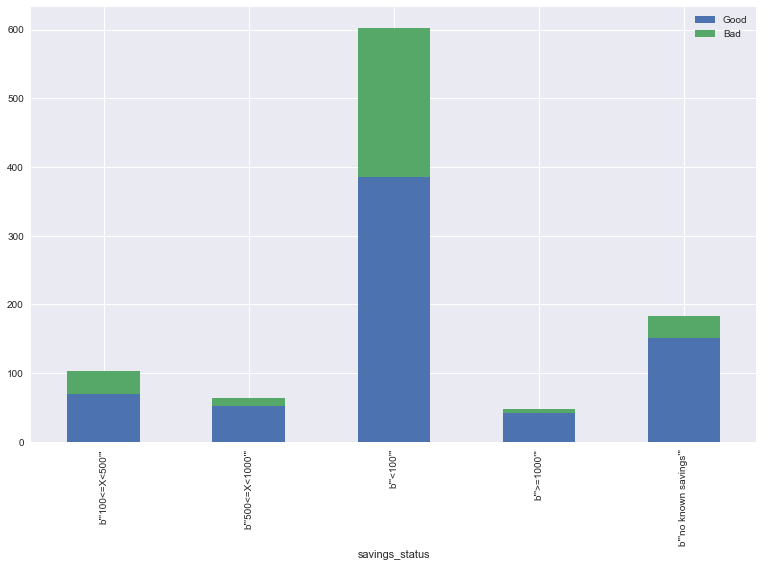

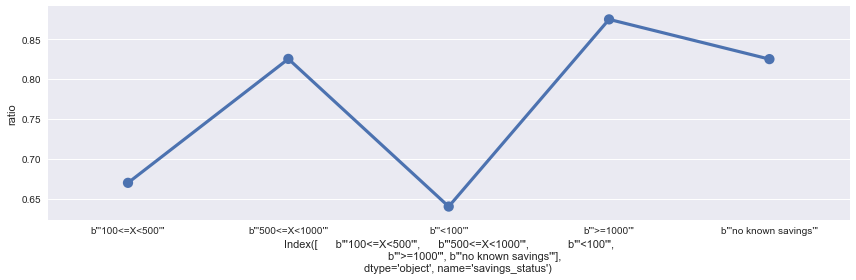

In [10]:
stacked_category_barplot(df, 'savings_status')

'savings_status' has some what relationship whit class as intuition<br>
but I don't know why the 'None saving' has the highest class mean<br>
> divide 2 category : x < 100 and x < 500 - 0 other - 1

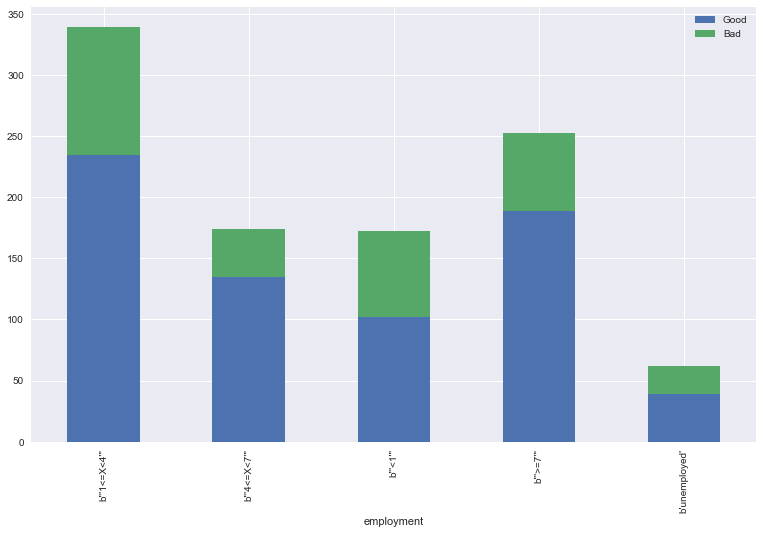

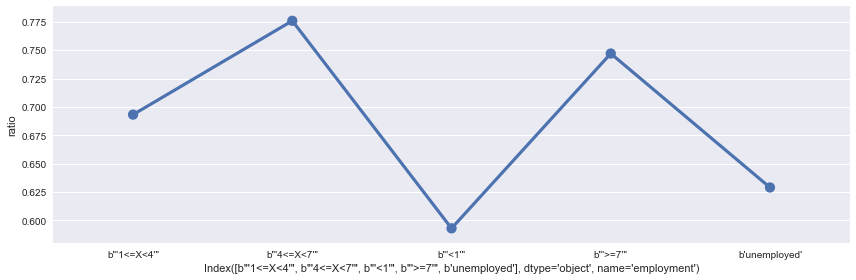

In [11]:
stacked_category_barplot(df, 'employment')

> divide 3 category : unemp and <1 - 0, 1< x < 4 - 1, 4<x - 2

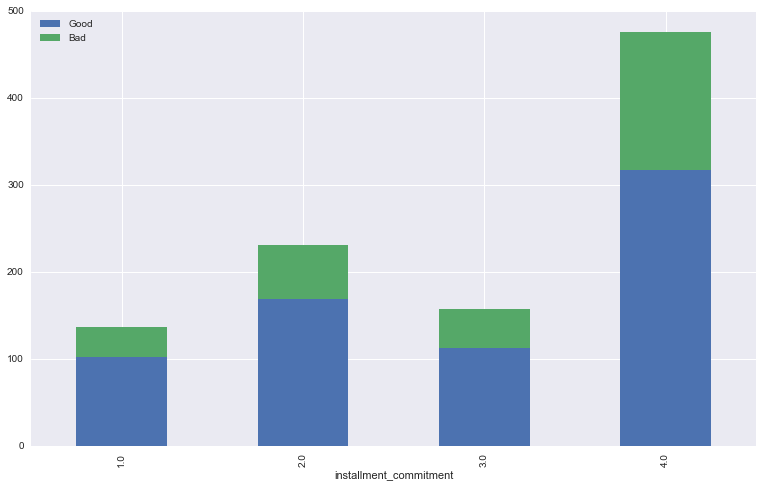

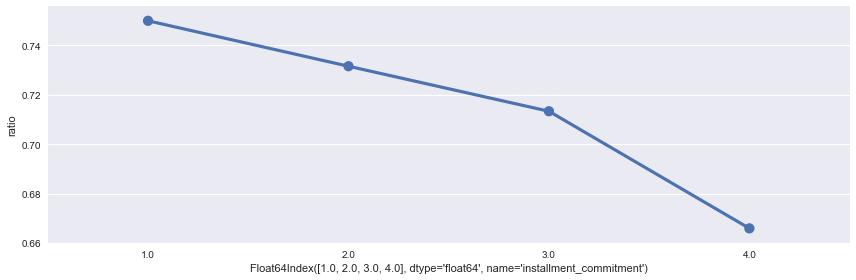

In [12]:
stacked_category_barplot(df, 'installment_commitment')

From the data statement : https://www.openml.org/d/31 <br>
Attribute 8: (numerical) <br>
Installment rate in percentage of disposable income<br>
I don't understand why the rate of installment & class are negatively correlated <br>


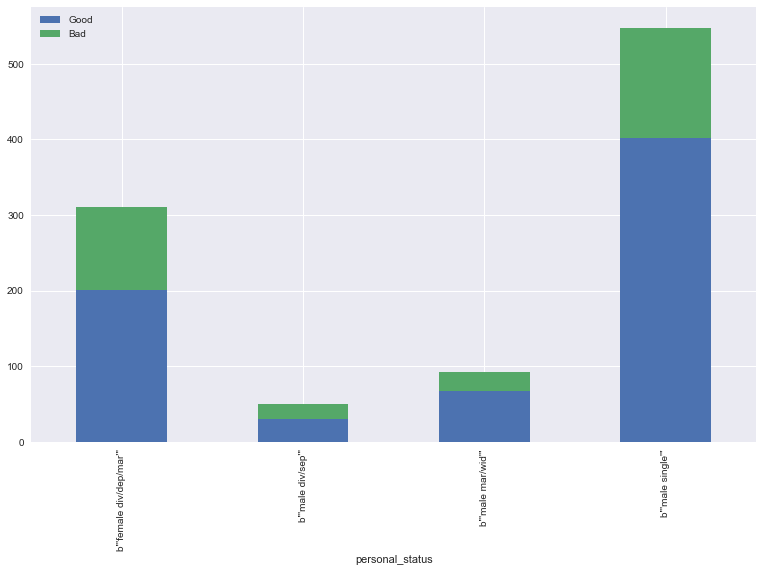

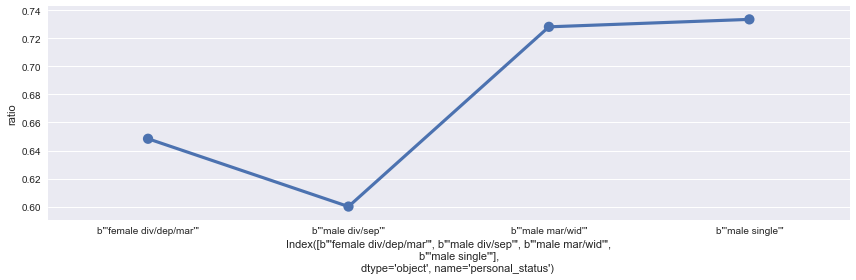

In [13]:
stacked_category_barplot(df, 'personal_status')

> Divide 2 category : male - 0, female - 1

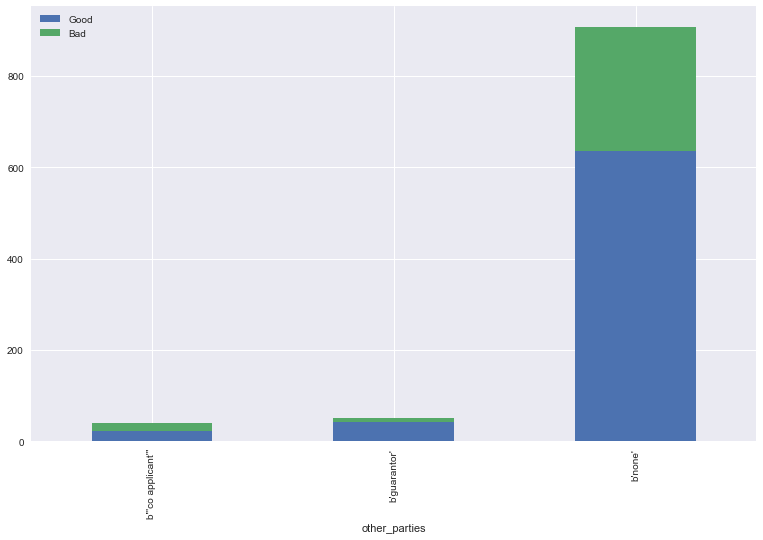

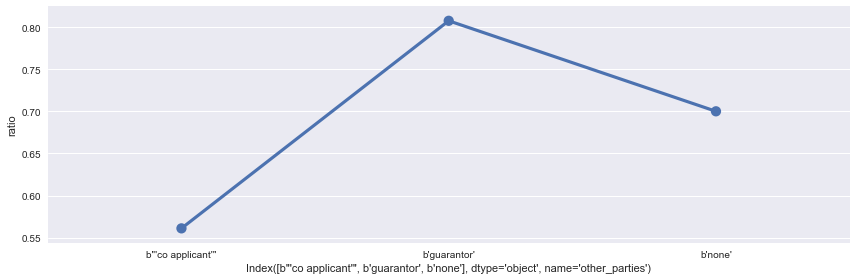

In [14]:
stacked_category_barplot(df, 'other_parties')

> Divide 2 Category : co - none - 0, guarantor - 1 

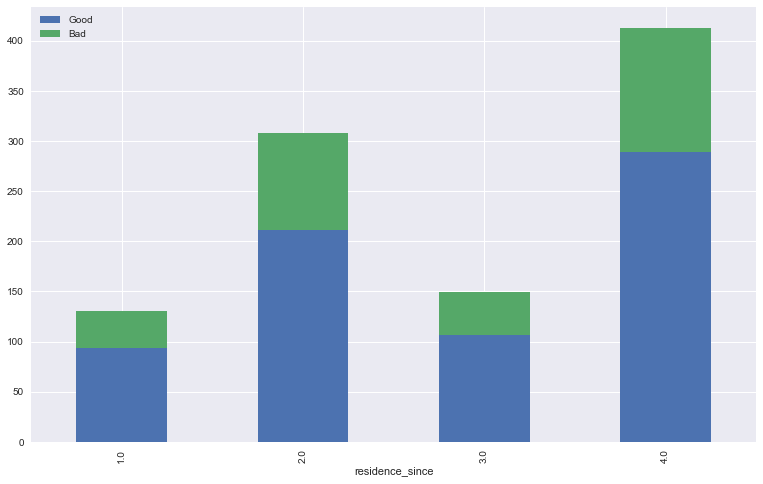

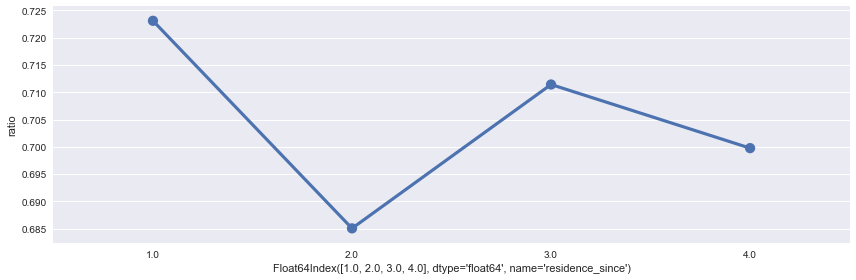

In [15]:
stacked_category_barplot(df, 'residence_since')

> Drop 'residence_since'

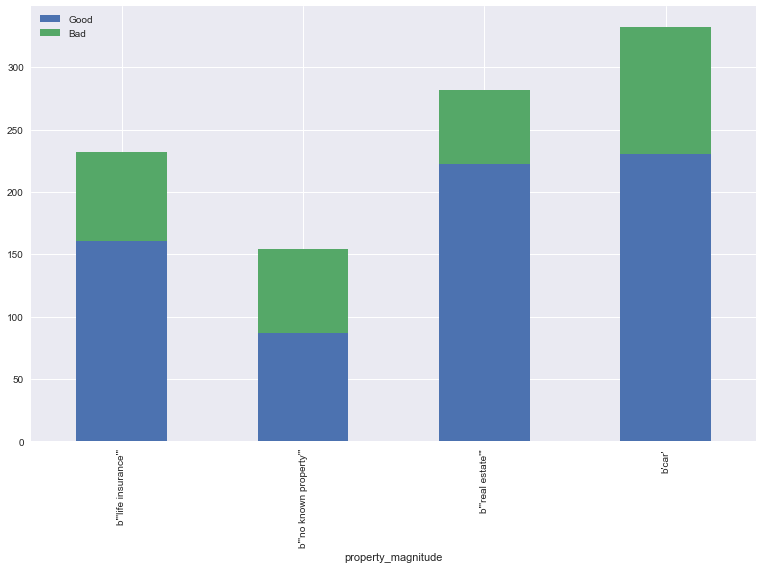

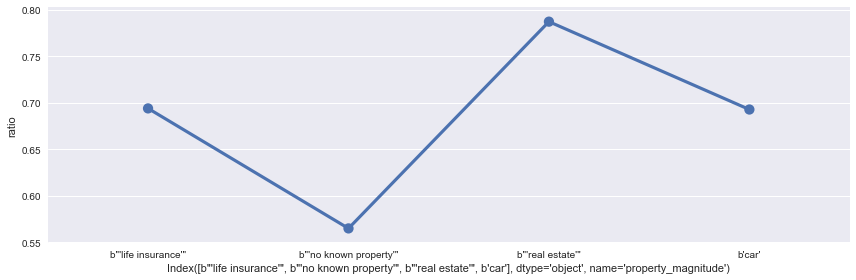

In [16]:
stacked_category_barplot(df, 'property_magnitude')

> Divide Three Category : No :0 , life insurance + car / 1, real_estate 2 

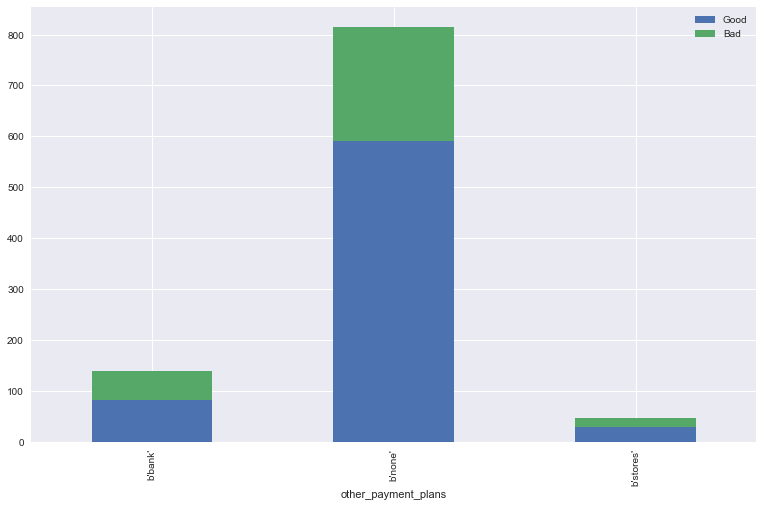

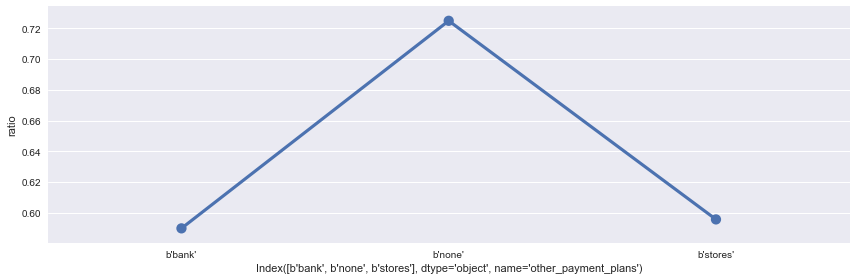

In [17]:
stacked_category_barplot(df, 'other_payment_plans')

> Divide 2 category : bank and stores - 0, none - 1

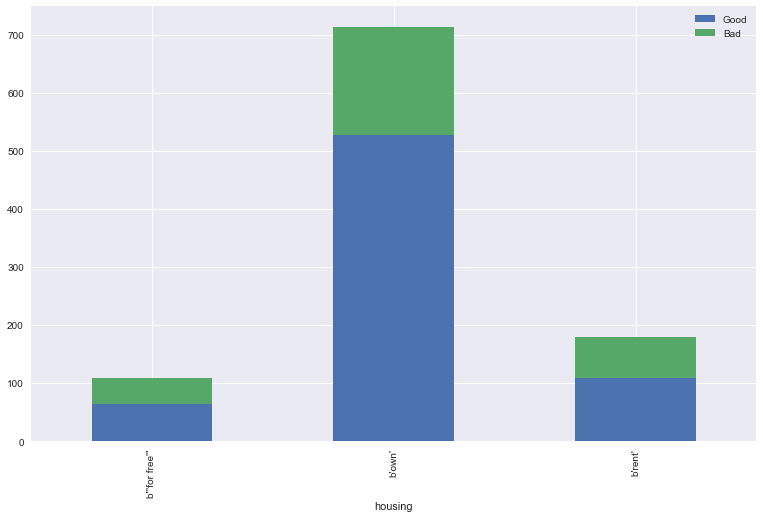

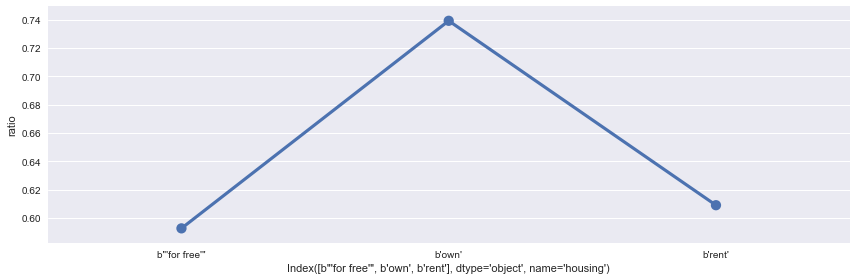

In [18]:
stacked_category_barplot(df, 'housing')

> divide 2 category - Housing : Own : 1 or other : 0

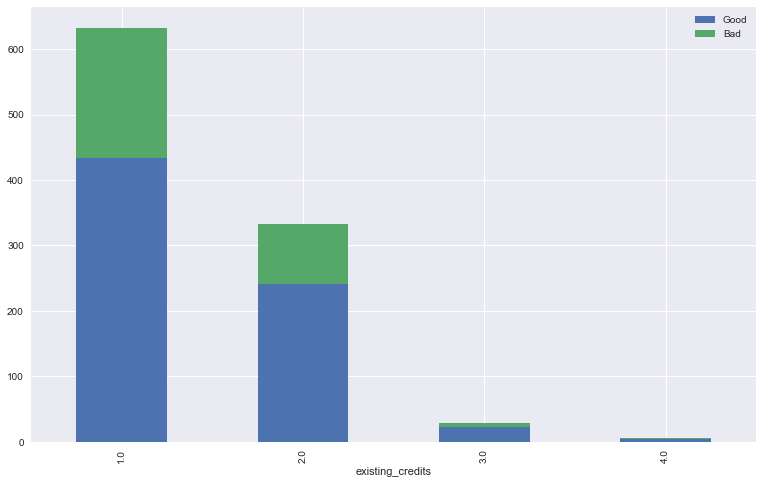

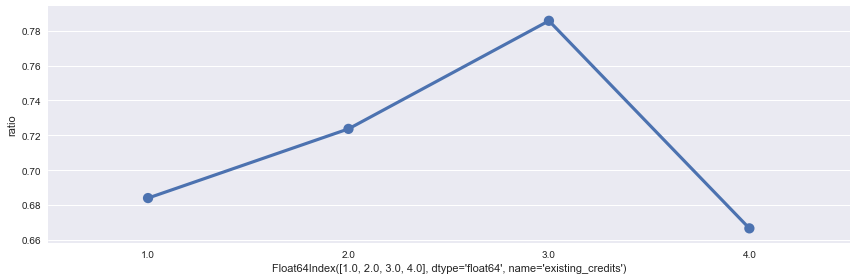

In [19]:
stacked_category_barplot(df, 'existing_credits')

> Divide 3 category : 1 - 0, 2 - 1 , 3 & 4 - 2

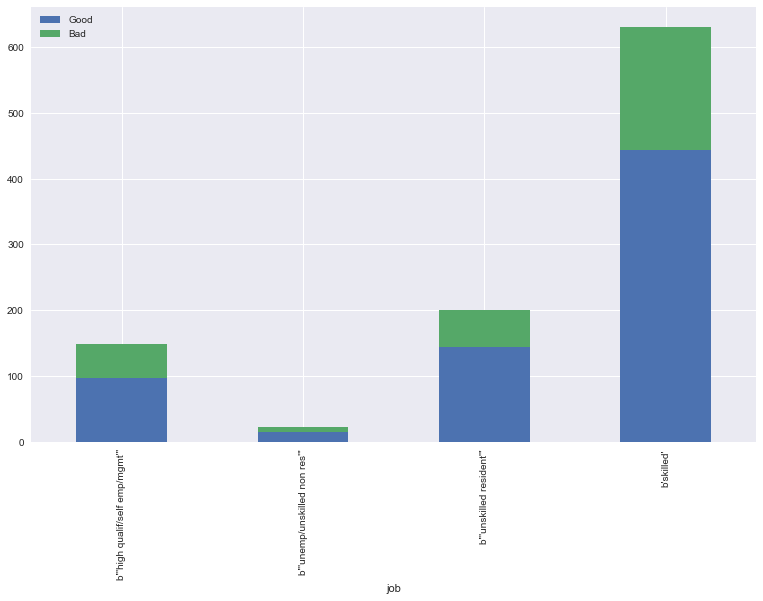

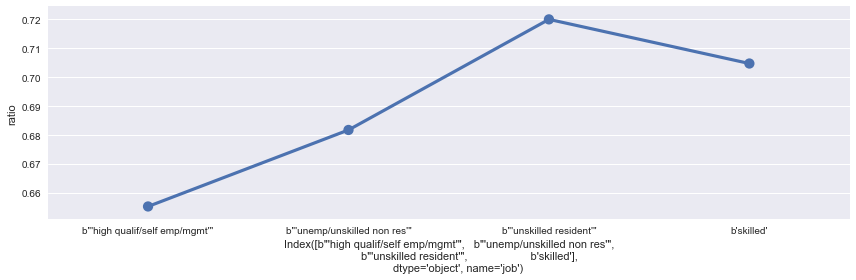

In [20]:
stacked_category_barplot(df, 'job')

> divide 2 category : self * non res - 0, other - 1 

foreign_worker  class
0               0          4
                1         33
1               0        296
                1        667
Name: own_telephone, dtype: int64


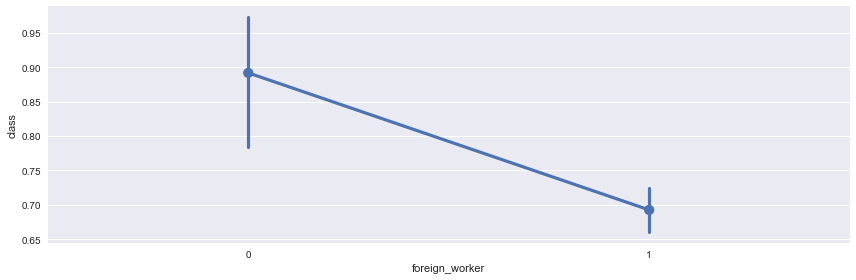

In [21]:
display_barplot(df, 'foreign_worker')

num_dependents  class
0               0        254
                1        591
1               0         46
                1        109
Name: own_telephone, dtype: int64


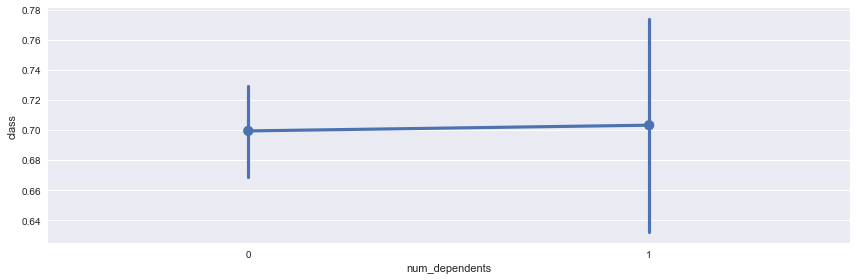

In [22]:
display_barplot(df, 'num_dependents')

Drop 'num_dependents'

# Target Class Base rate : 70% Accuracy
<br>
class : 1 70% <br>
It means that randomly selected data will have 70% of class 1 <br>
so I think model accuracy should have more than 70% <br>
<br>
<br>



<br>
# Feature Engineering Part <br>
<br>

In [25]:
df, col_names = load_german_data()

def get_dic(df, col_name, val):
    
    u_list =df[col_name].unique()
    dic = dict((key, value) for (key, value) in zip(u_list, val))
    return dic 

def feature_eng_2(df):
    
    col_list = ['checking_status', 'credit_history', 'purpose', 'savings_status',\
               'employment', 'personal_status', 'other_parties', 'property_magnitude', \
               'other_payment_plans', 'housing', 'existing_credits', 'job']
    val_list = [[ 0, 1, 2, 2 ], [ 2, 1, 1, 0, 0 ], [1, 0, 0, 0, 1, 0, 0, 0, 0, 1], [1, 0, 1, 1, 0],\
               [ 2, 1, 2, 0, 0 ], [ 0, 1, 0, 0 ], [ 0, 1, 0], [ 2, 1, 0, 1], \
               [ 1, 0, 0 ], [ 1, 0, 0 ], [ 1, 0, 2, 2 ], [ 1, 1, 0, 0 ]]
    
#    for col, val in col_list, val_list:
    for i in range(len(col_list)):
        col = col_list[i]
        val = val_list[i]
        df[col]=df[col].map(get_dic(df, col, val)).astype(int)
        
#    u_list = df['checking_status'].unique()
#    val = [ 0, 1, 2, 2 ]
#    dic = dict((key, value) for (key, value) in zip(u_list, val))

    df['duration']=np.log(df['duration'])
    df['credit_amount']=np.log(df['credit_amount'])
    df['age']=np.log(df['age'])
    df = df.drop('residence_since', axis=1)
    df = df.drop('num_dependents', axis=1)
    
    return df

df = feature_eng_2(df)
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,property_magnitude,age,other_payment_plans,housing,existing_credits,job,own_telephone,foreign_worker,class
0,0,1.791759,2,1,7.063904,1,2,4,0,0,2,4.204693,1,1,1,1,1,1,1
1,1,3.871201,1,1,8.691315,0,1,2,1,0,2,3.091042,1,1,0,1,0,1,0
2,2,2.484907,2,0,7.647786,0,2,2,0,0,2,3.891820,1,1,0,1,0,1,1
3,0,3.737670,1,0,8.972337,0,2,2,0,1,1,3.806662,1,0,0,1,0,1,1
4,0,3.178054,1,0,8.490849,0,1,3,0,0,0,3.970292,1,0,1,1,0,1,0


<br>
# Feature Selection Process
<br>
<br>


In [26]:
def feature_selection_method1(df, cutoff = 'zero', treshhold = 6):
    
    """
    Input Variable - 
        df - datasets
        cutoff - method of cutoff 
                ['mean' ,'median', 'mean_median', 'zero' ]
    """
    
    X = df.drop('class', axis=1)
    y = df['class']
    
    X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, test_size = 0.2, random_state=RANDOM_SEED)
    
    clf = DecisionTreeClassifier(random_state=0)
    clf.fit(X_train, y_train)
    
    features = pd.DataFrame()
    features['feature'] = X_train.columns
    features['importance'] = clf.feature_importances_
    features['mean'] = features['importance']>features['importance'].mean()
    features['median'] = features['importance']>features['importance'].median()
    
    features=features.sort(['importance'],ascending=False)

    
    if cutoff == 'mean_median':
        selected_feature_list = \
                list(features[(features['mean'])|(features['median'])]['feature'])
    elif cutoff == 'mean':
        selected_feature_list = \
                list(features[(features['mean'])]['feature'])
    elif cutoff == 'median':
        selected_feature_list = \
                list(features[(features['median'])]['feature'])
    elif cutoff == 'zero':
        selected_feature_list = \
                list(features[(features['importance']>0)]['feature'])
    
#    print (selected_feature_list)
    
    
#    print ("Old feature # : "+str(X.shape[1]))
    X = X[selected_feature_list[:treshhold]]
    
#    print ("New feature # : "+str(X.shape[1]))
    
    return X, y

X, y = feature_selection_method1(df, 'mean_median')

In [27]:
def test_logreg(X,y):
    clf = LogisticRegression()
    
    
    cross_score = []
    
    for tr in range(1,20):
        X, y = feature_selection_method1(df, cutoff = 'mean_median', treshhold = tr)
        X_train, X_test, y_train, y_test = train_test_split(X,y, \
                                        stratify=y, test_size = 0.2, random_state=RANDOM_SEED)
        cross = cross_val_score(clf, \
                        X_train, y = y_train, scoring = "accuracy", cv = 5, n_jobs=4)
        cross_score.append(np.mean(cross))
#        print ("Score : "+str(np.mean(cross)))
        
    feature_num = pd.DataFrame()
    feature_num['num'] = range(1,20)
    feature_num['score'] = cross_score
    
    X, y = feature_selection_method1(df, cutoff = 'mean_median', treshhold = 19)
    X_train, X_test, y_train, y_test = train_test_split(X,y, \
                                        stratify=y, test_size = 0.2, random_state=RANDOM_SEED)
    
    clf.fit(X_train, y_train)
    print ("Train Score : "+str(clf.score(X_train, y_train)))
    print ("Test Score : "+str(clf.score(X_test, y_test)))
    print (confusion_matrix(y_train, clf.predict(X_train)))
    return feature_num
#    print (cross.score(X_test, y_test))
    
X = df.ix[:,'checking_status':'foreign_worker']
y = df['class']
feature_num = test_logreg(X,y)  
feature_num
    

Train Score : 0.75875
Test Score : 0.71
[[117 123]
 [ 70 490]]


,num,score
0,1,0.70000
1,2,0.70000
2,3,0.72750
3,4,0.74375
4,5,0.74000
5,6,0.76125
6,7,0.75500
7,8,0.75500
8,9,0.75250
9,10,0.75250


Old feature # :  18
New feature # :  9


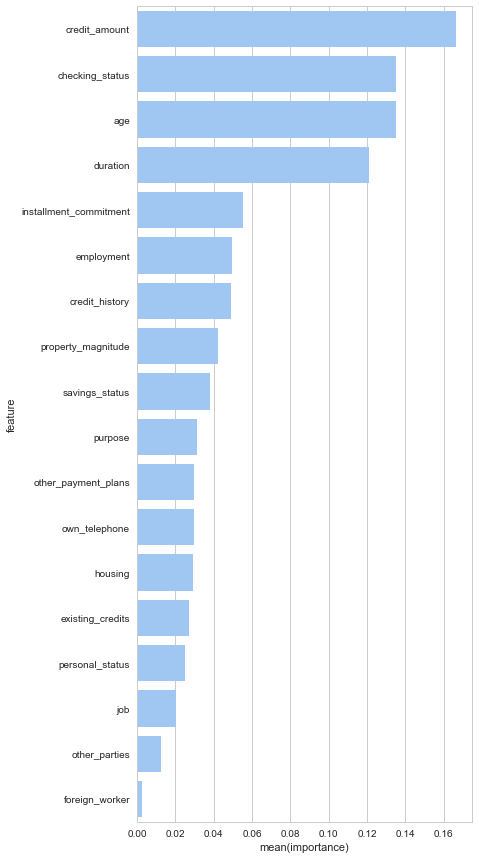

In [28]:
def feature_selection_method2(df, cutoff = 'mean', print_graph = 'False'):
    
    X = df.drop('class', axis=1)
    y = df['class']
    
#    print (X.iloc[0], y[0])
    
    X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, \
                                          test_size = 0.2, random_state=RANDOM_SEED)
    
    clf = RandomForestClassifier(n_estimators=100, random_state=RANDOM_SEED)
    clf = clf.fit(X_train, y_train)
    features = pd.DataFrame()
    features['feature'] = X_train.columns
    features['importance'] = clf.feature_importances_

    features=features.sort(['importance'],ascending=False)
    
#    print (features.sort(['importance'],ascending=False))
    
    selec_model = SelectFromModel(clf, threshold=cutoff, prefit=True)
    X_train_selected = selec_model.transform(X_train)
    print ("Old feature # : ", X_train.shape[1])
    print ("New feature # : ", X_train_selected.shape[1])
    
    X_test_selected = selec_model.transform(X_test)
    
    sns.set(style="whitegrid")

    # Initialize the matplotlib figure
    if print_graph == 'True':
        f, ax = plt.subplots(figsize=(6, 15))

        sns.set_color_codes("pastel")
        sns.barplot(x="importance", y="feature", data=features,
                label="Total", color="b")
    
    return X_train_selected, X_test_selected, y_train, y_test
    
X_train, X_test, y_train, y_test = feature_selection_method2(df, cutoff='median',print_graph = 'True')


<br>
# Model Selection 
<br>
<br>


In [30]:

def model_selection(df):
    
    kfold = StratifiedKFold(n_splits=5)
    
    #X_train, X_test, y_train, y_test = feature_selection_method2(df, cutoff='mean')
    
    X, y = feature_selection_method1(df, 'mean_median', treshhold = 20)
    X_train, X_test, y_train, y_test = train_test_split(X,y, \
                            stratify=y, test_size = 0.2, random_state=RANDOM_SEED)
    
    classifiers = []
    classifiers.append(SVC(random_state=RANDOM_SEED))
#    classifiers.append(DecisionTreeClassifier(random_state=RANDOM_SEED))
    classifiers.append(RandomForestClassifier(random_state=RANDOM_SEED))
    classifiers.append(GradientBoostingClassifier(random_state=RANDOM_SEED))
#    classifiers.append(MLPClassifier(random_state=RANDOM_SEED))
#    classifiers.append(KNeighborsClassifier())
    classifiers.append(LogisticRegression())
    
    cv_results = []
    for classifier in classifiers :
        cv_results.append(cross_val_score(classifier, \
                        X_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4))
        
    cv_means = []
    cv_std = []
    for cv_result in cv_results:
        cv_means.append(cv_result.mean())
        cv_std.append(cv_result.std())

    cv_res = \
             pd.DataFrame({"CrossVal_Score_Means":cv_means,"CrossVal_STD": cv_std,\
                   "Algorithm":["SVC",
                               # "DecisionTree", 
                                "RandomForest","GradientBoosting", \
                               # "MultipleLayer","KNeighboors",
                                "LogisticRegression"]})
    return cv_res

rtn = model_selection(df)   
rtn

,Algorithm,CrossVal_STD,CrossVal_Score_Means
0,SVC,0.020540,0.75000
1,RandomForest,0.031275,0.72250
2,GradientBoosting,0.013919,0.73875
3,LogisticRegression,0.030000,0.75250


In [31]:
def randomforest_classificatiion(X_train, X_test, y_train, y_test):
    
    clf = RandomForestClassifier(max_features='sqrt')
    kfold = StratifiedKFold(n_splits=5)
    
    parameter_grid = {
                 'max_depth' : [3,4,5,6,7],
                 "max_features": [1, 3, 5, 7],
                 'n_estimators': [100,200,300,400,500],
                 'criterion': ['gini','entropy']
                 }
    
    grid = GridSearchCV(clf, parameter_grid, \
                       cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1 )
    
    grid.fit(X_train, y_train)
    
    print (grid.best_params_)
    print (grid.best_score_)
    print (grid.score(X_test, y_test))
    
    return grid

    #cross_validation = StratifiedKFold(targets, n_folds=5)

#X_train, X_test, y_train, y_test = feature_selection_method2(df_cat, cutoff='median')    


X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, \
                                          test_size = 0.2, random_state=RANDOM_SEED)
grid = randomforest_classificatiion(X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    9.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   45.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.9min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  3.5min
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:  4.3min finished


{'criterion': 'gini', 'max_depth': 7, 'max_features': 3, 'n_estimators': 100}
0.765
0.755


In [32]:
grid.score(X_test, y_test)

0.755

In [33]:
def gradientboosting_classificatiion(X_train, X_test, y_train, y_test):
    
    clf = GradientBoostingClassifier()
    kfold = StratifiedKFold(n_splits=5)

    parameter_grid = {
                 'max_depth' : [3,4,5,6,7], 
                 'learning_rate' : [0.001, 0.01, 0.1, 1],
                 'n_estimators': [200,300,400,500]
                 }
    
    grid = GridSearchCV(clf, parameter_grid, \
                       cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1 )
    
    grid.fit(X_train, y_train)
    
    print (grid.best_params_)
    print (grid.best_score_)
    print (grid.score(X_test, y_test))
    
    return grid

    #cross_validation = StratifiedKFold(targets, n_folds=5)

#X_train, X_test, y_train, y_test = feature_selection_method2(df, cutoff='median') 
grid_gb = gradientboosting_classificatiion(X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    9.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done 400 out of 400 | elapsed:  2.0min finished


{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
0.76875
0.705
